In [31]:
import pandas as pd

In [32]:
import yfinance as yf
import datetime as dt

In [33]:
start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [34]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2013-06-03,148.500000,149.750000,145.100006,146.740005
2013-06-04,145.300003,150.899994,145.300003,146.214996
2013-06-05,144.899994,147.000000,144.899994,145.949997
2013-06-06,146.500000,147.000000,145.535004,146.369995
2013-06-07,146.619995,148.485001,144.600006,145.169998
...,...,...,...,...
2022-02-04,217.500000,217.649994,213.000000,213.550003
2022-02-07,213.550003,215.300003,210.199997,211.649994
2022-02-08,212.000000,213.500000,208.100006,210.750000


In [35]:
column="Close"

In [36]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (2144, 1)


In [37]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1715
X_train length: (1715, 1)
X_test length: (429, 1)
y_train length: (1715, 1)
y_test length: (429, 1)


In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(X_train)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train),len(data1)-1)
#print(y_pred)
from stockFunctions import rmsemape
rmsemape(y_test,y_pred)
#print("{},{}".format(r))
print("------------------")

RMSE-Testset: 0.4877595501893428
maPe-Testset: 0.6672566110371337
------------------


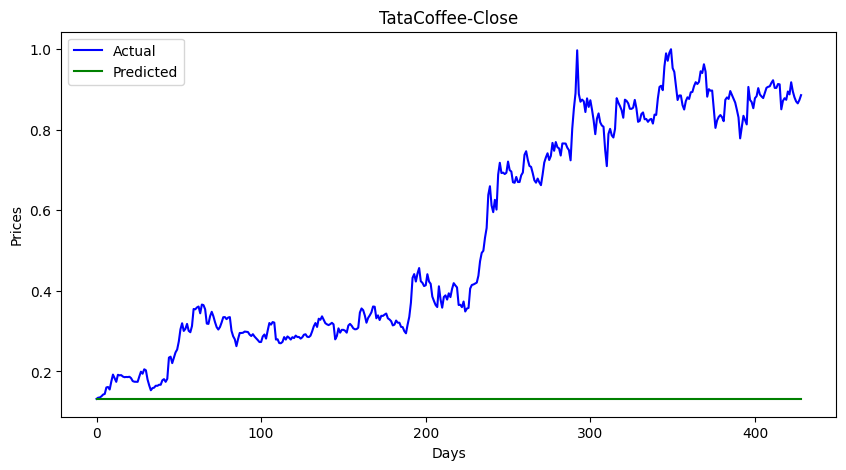

In [40]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [41]:
y_test

array([[0.13197424],
       [0.1349249 ],
       [0.13546137],
       [0.13841199],
       [0.14270385],
       [0.14431331],
       [0.16040773],
       [0.16148068],
       [0.15531114],
       [0.17516095],
       [0.19232832],
       [0.18320816],
       [0.17435622],
       [0.19179184],
       [0.19045064],
       [0.19098711],
       [0.18749998],
       [0.18589056],
       [0.18642704],
       [0.18615878],
       [0.18696351],
       [0.18347638],
       [0.1762339 ],
       [0.17462444],
       [0.17462444],
       [0.17435622],
       [0.18749998],
       [0.1995708 ],
       [0.19447425],
       [0.20547208],
       [0.20305793],
       [0.1802575 ],
       [0.16577254],
       [0.15343347],
       [0.15879827],
       [0.15987122],
       [0.16469955],
       [0.16443134],
       [0.16711374],
       [0.16711374],
       [0.17811157],
       [0.18106223],
       [0.17435622],
       [0.18186696],
       [0.23444204],
       [0.23685623],
       [0.22076181],
       [0.234

In [42]:
y_pred

array([0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116

In [43]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,74.0
1,74.550003
2,74.650002
3,75.199997
4,76.0
...,...
424,213.550003
425,211.649994
426,210.75
427,212.300003


In [44]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
predicted_stock_price_test_oriP

,Close
0,73.849998
1,73.849998
2,73.849998
3,73.849998
4,73.849998
...,...
424,73.849998
425,73.849998
426,73.849998
427,73.849998


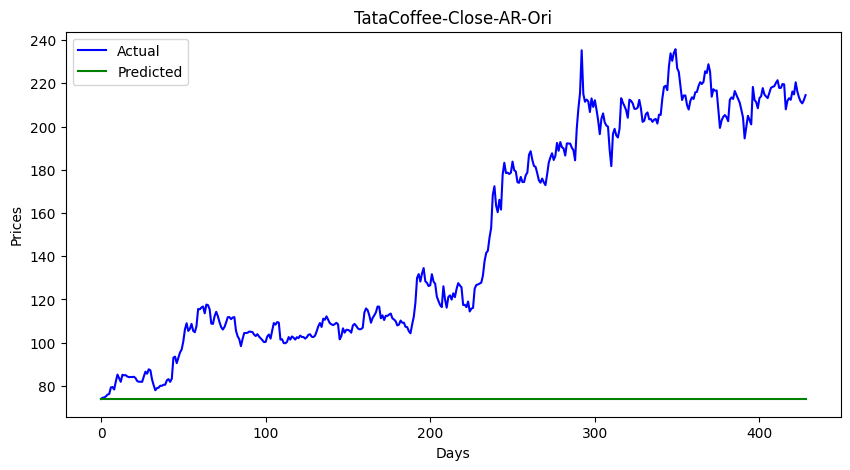

In [45]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [46]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 90.91838089955552
maPe-Testset: 0.44238145628404746


In [55]:
forecast= model_fit.predict(len(data1),len(data1)+10)

In [54]:
forecast

array([0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116951,
       0.13116951, 0.13116951, 0.13116951, 0.13116951, 0.13116

In [56]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Forecasted_Close"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Forecasted_Close"])
forecast_stock_price_test_oriF

,Forecasted_Close
0,73.849998
1,73.849998
2,73.849998
3,73.849998
4,73.849998
5,73.849998
6,73.849998
7,73.849998
8,73.849998
9,73.849998
